# Capstone Project

The import libraries are given below.

In [239]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib as plot
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os
import datetime as dt
import sys
#print(sys.path)
import sklearn

The reference website that I used to collect data is [data.gov] [identification tag for link]

[identification tag for link]: https://catalog.data.gov/dataset/real-estate-sales-by-town-for-2011-2012
To elaborate, The Office of Policy and Management maintains a listing of all real estate sales with a sales price of $2,000 or greater that occur between October 1 and September 30 of each year. For each sale record, the file includes: town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land), sales price, and property assessment.


In [247]:
url="https://data.ct.gov/api/views/8udc-aepg/rows.csv?accessType=DOWNLOAD"
s=requests.get(url).content
raw_df=pd.read_csv(io.StringIO(s.decode('utf-8')))

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



The columns include Name , SerialNbr, the date whent he property was listed as ListYear,the date when the property was recorded as DateRecorded,The assessed value as AssessedValue and Selling prize is recorded as SalePrice .There are other columns as well but somehow since some of them are irrelevent regarding to the outcome I am trying to come up with this is why I droped some column.

In [249]:
#df.head(1000)
print(raw_df.columns)
raw_df.head(5)

Index(['Name', 'SerialNbr', 'ListYear', 'DateRecorded', 'AssessedValue',
       'SalePrice', 'AdditionalRemarks', 'SalesRatio', 'NonUseCode',
       'ResidentialType', 'ResidentialUnits', 'Address', 'Location'],
      dtype='object')


,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,AdditionalRemarks,SalesRatio,NonUseCode,ResidentialType,ResidentialUnits,Address,Location
0,Bridgeport,110682,2011,03/08/2012,162040.0,233500.0,NaN,0.693961,NaN,1,1,144 HUGHES AVE,"144 HUGHES AVE\nBridgeport, CT\n(41.1837144900..."
1,Ledyard,120059,2012,01/16/2013,67830.0,75000.0,0.0,0.904400,NaN,C,1,1742-3G ROUTE 12,"1742-3G ROUTE 12\nLedyard, CT\n(41.47126158500..."
2,Milford,12497,2012,05/31/2013,201300.0,255000.0,0.0,0.789412,NaN,1,1,51 SPARROWBUSH LANE,"51 SPARROWBUSH LANE\nMilford, CT\n(41.22758963..."
3,New Haven,110828,2011,07/30/2012,49630.0,39900.0,NaN,1.243860,14.0,1,1,337 GREENWICH AVENUE,"337 GREENWICH AVENUE\nNew Haven, CT\n(41.28790..."
4,Colebrook,11007,2011,05/14/2012,196100.0,235000.0,NaN,0.834468,NaN,1,1,15 WHEELER RD,"15 WHEELER RD\nColebrook, CT\n(41.982079222000..."


To make the assumption right These are the columns that were dropped.

In [250]:
df=raw_df.drop(['AdditionalRemarks',"NonUseCode",'ResidentialType','ResidentialUnits','Location'],axis=1)

## Changes in Dataframe



 * Changes:
      * I included a difference of salling price and assessed value as a "diff" column
      * I included the decision of increase and decrease of price using in the "increase_decrease" column ,The                 decision is "1" if the price increases ,the decision is "-1" if the price decreases.Since there are rows where         the Assessed value was not recorded and we only have the SaleValue data this why the decision is "0" for those         specific data rows. 
      * The "percentage" column is included since I calculated the percentage of price increase or decrease 

In [264]:
df['diff'] = df['SalePrice'] - df['AssessedValue'] #difference of price
df['increase_decrease'] =  df['diff'].map(lambda x: '1' if x > 0 else '-1')#maping a decision level for the increase or decrease of price
#df['increase_decrease'] =  df['SalesRatio'].map(lambda x: '0' if x == 0.0 else )
df.loc[df.SalesRatio == 0.0, 'increase_decrease'] = '0'#Since there are rows where AssessedValue is missing

df["percentage"]=df['diff']/df['AssessedValue']*100 #Requied to answer the question . 
#df.round("percentage")
df["percentage"]=df["percentage"].apply(lambda x:round(x,2))
df.loc[df.SalesRatio == 0.0, 'increase_decrease'] = '0'

In [265]:
df

,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,SalesRatio,Address,diff,increase_decrease,percentage
0,Bridgeport,110682,2011,03/08/2012,162040.0,233500.0,0.693961,144 HUGHES AVE,71460.0,1,4.410000e+01
1,Ledyard,120059,2012,01/16/2013,67830.0,75000.0,0.904400,1742-3G ROUTE 12,7170.0,1,1.057000e+01
2,Milford,12497,2012,05/31/2013,201300.0,255000.0,0.789412,51 SPARROWBUSH LANE,53700.0,1,2.668000e+01
3,New Haven,110828,2011,07/30/2012,49630.0,39900.0,1.243860,337 GREENWICH AVENUE,-9730.0,-1,-1.961000e+01
4,Colebrook,11007,2011,05/14/2012,196100.0,235000.0,0.834468,15 WHEELER RD,38900.0,1,1.984000e+01
5,Wethersfield,12206,2012,06/14/2013,128400.0,165000.0,0.778182,56 CEDAR ST,36600.0,1,2.850000e+01
6,New Canaan,120430,2012,09/12/2013,857920.0,1176501.0,0.729213,219 BUTTERY ROAD,318581.0,1,3.713000e+01
7,East Hartford,12125,2012,09/03/2013,83800.0,120000.0,0.698333,"31 HIGH ST., UNIT 8206",36200.0,1,4.320000e+01
8,Litchfield,120048,2012,03/20/2013,171320.0,238000.0,0.719832,17 TOLL GATE RD,66680.0,1,3.892000e+01
9,Southbury,11187,2011,05/30/2012,125370.0,119000.0,1.053529,485 B HERITAGE VLG,-6370.0,-1,-5.080000e+00


The basic information of the dataframe

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156544 entries, 0 to 156543
Data columns (total 11 columns):
Name                 156544 non-null object
SerialNbr            156544 non-null int64
ListYear             156544 non-null int64
DateRecorded         156532 non-null object
AssessedValue        156544 non-null float64
SalePrice            156544 non-null float64
SalesRatio           156544 non-null float64
Address              156544 non-null object
diff                 156544 non-null float64
increase_decrease    156544 non-null object
percentage           156544 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 13.1+ MB


# Data Cleaning

*Since there are missing values in the DateRecorded column it has 156532 datas instead of 156544 values
*The missing values of "DateRecorded" ,I filled with NaN values

In [6]:
df['DateRecorded'].isnull().sum()
#df.info()
df['DateRecorded'].fillna(np.nan,inplace=True)
df.info()
df["DateRecorded"].iloc[6]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156544 entries, 0 to 156543
Data columns (total 11 columns):
Name                 156544 non-null object
SerialNbr            156544 non-null int64
ListYear             156544 non-null int64
DateRecorded         156532 non-null object
AssessedValue        156544 non-null float64
SalePrice            156544 non-null float64
SalesRatio           156544 non-null float64
Address              156544 non-null object
diff                 156544 non-null float64
increase_decrease    156544 non-null object
percentage           156544 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 13.1+ MB


'09/12/2013'

In [256]:
df1 = df[df.isnull().any(axis=1)]
df1

,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,SalesRatio,Address,diff,increase_decrease,percentage
87974,New Fairfield,130212,2013,NaN,371600.0,462500.0,0.803000,12 HICKORY LANE,90900.0,1,24.46
88627,New Haven,130134,2013,NaN,49420.0,22310.0,2.215000,436 HUNTINGTON ST,-27110.0,-1,-54.86
100163,Torrington,130110,2013,NaN,149890.0,150000.0,0.999000,58 CARROLL DR,110.0,1,0.07
102048,Waterbury,130565,2013,NaN,49120.0,13000.0,3.778000,13 BRONSON ST,-36120.0,-1,-73.53
102305,Waterbury,130816,2013,NaN,45540.0,45000.0,1.012000,53 WELCH ST,-540.0,-1,-1.19
102450,Waterbury,130963,2013,NaN,11060.0,20000.0,0.553000,BOYDEN ST,8940.0,1,80.83
107359,Avon,140116,2014,NaN,1550660.0,1470000.0,1.054871,605 DEERCLIFF ROAD,-80660.0,-1,-5.20
107767,Avon,140407,2014,NaN,231040.0,258000.0,0.895504,1 BRAMBLE BUSH,26960.0,1,11.67
134119,Newington,14103,2014,NaN,188800.0,247500.0,0.762828,166 FOREST DRIVE,58700.0,1,31.09
138164,Oxford,140039,2014,NaN,278900.0,349995.0,0.796869,627 CHAMPIONSHIP DR,71095.0,1,25.49







Since there are rows where DateRecorded are missing but we have the ListYear values.Based on assumption that most of the properties were recorded after a year it was listed I replaced the null values with the first day and first month of the next year.






In [259]:
df.loc[(pd.isnull(df.DateRecorded)),"DateRecorded"]=df.ListYear
df.loc[df['DateRecorded'] ==2013, 'DateRecorded'] = "1/1/2014"
df.loc[df['DateRecorded'] ==2014, 'DateRecorded'] = "1/1/2015"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156544 entries, 0 to 156543
Data columns (total 11 columns):
Name                 156544 non-null object
SerialNbr            156544 non-null int64
ListYear             156544 non-null int64
DateRecorded         156544 non-null object
AssessedValue        156544 non-null float64
SalePrice            156544 non-null float64
SalesRatio           156544 non-null float64
Address              156544 non-null object
diff                 156544 non-null float64
increase_decrease    156544 non-null object
percentage           156544 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 13.1+ MB


Checking data after cleaning:

In [260]:
df["DateRecorded"].iloc[102450]
df["DateRecorded"].iloc[138164]
#df["DateRecorded"].iloc[14]

'1/1/2015'

In [261]:
df1 = df[df.isnull().any(axis=1)]
df1
#df[P]

,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,SalesRatio,Address,diff,increase_decrease,percentage




*since there are some infinite values in percentage column I replaced it with zero



In [51]:
df=df.replace(np.Inf, 0)
df.describe()

,SerialNbr,ListYear,AssessedValue,SalePrice,SalesRatio,diff,percentage
count,1.565440e+05,156544.000000,1.565440e+05,1.565440e+05,156544.000000,1.565440e+05,1.565440e+05
mean,1.448126e+05,2012.689927,3.469019e+05,4.012095e+05,2.182245,5.430767e+04,2.390372e+02
std,6.879196e+05,1.115363,1.712831e+06,1.596074e+06,27.010002,1.750157e+06,2.362534e+04
min,1.100000e+02,2011.000000,0.000000e+00,0.000000e+00,0.000000,-7.696521e+07,0.000000e+00
25%,1.100730e+05,2012.000000,1.130175e+05,1.250000e+05,0.651000,2.468000e+03,2.104000e+01
50%,1.204770e+05,2013.000000,1.652650e+05,2.140000e+05,0.760795,4.967000e+04,3.878000e+01
75%,1.400260e+05,2014.000000,2.653000e+05,3.630000e+05,0.980000,1.097600e+05,5.821250e+01
max,1.400028e+08,2014.000000,8.946521e+07,1.523841e+08,3467.128000,1.191968e+08,8.082900e+06





*I chose the specific data for the properties listed in year 2014




In [73]:
df2=df[df["ListYear"].values  == 2014]
df2

#df2 = df[(df["ListYear"].values == 2013) & (df["ListYear"].values==2014)]
#df2

,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,SalesRatio,Address,diff,increase_decrease,percentage
106981,Andover,14010,2014,01/05/2015,42800.0,12500.0,3.424000,LAKE RD,-30300.0,-1,70.79
106982,Andover,14009,2014,01/06/2015,112000.0,140000.0,0.800000,18 ASPINALL DR,28000.0,1,25.00
106983,Andover,14008,2014,01/08/2015,53500.0,60750.0,0.880658,164 HENDEE ROAD,7250.0,1,13.55
106984,Andover,14007,2014,01/12/2015,187700.0,194000.0,0.967526,164 LAKE RD,6300.0,1,3.36
106985,Andover,14011,2014,01/14/2015,153100.0,190000.0,0.805789,1 JUROVATY LANE,36900.0,1,24.10
106986,Andover,14012,2014,02/11/2015,290700.0,394550.0,0.736789,2 SHADBLOW LANE,103850.0,1,35.72
106987,Ansonia,14197,2014,02/23/2015,112300.0,74000.0,1.517568,43 HUBBELL AVENUE,-38300.0,-1,34.11
106988,Andover,14013,2014,02/25/2015,345200.0,675000.0,0.511407,390 ROUTE 6,329800.0,1,95.54
106989,Andover,14014,2014,03/02/2015,176700.0,147500.0,1.197966,64 LONG HILL RD,-29200.0,-1,16.53
106990,Andover,14017,2014,03/04/2015,134410.0,170750.0,0.787174,172 LONGHILL RD,36340.0,1,27.04


In [53]:
#df2.loc[df.percentage <0.0, 'percentage'] = -df2.percentage.values

In [71]:
df2


,Name,SerialNbr,ListYear,DateRecorded,AssessedValue,SalePrice,SalesRatio,Address,diff,increase_decrease,percentage


In [55]:
df2.describe()


,SerialNbr,ListYear,AssessedValue,SalePrice,SalesRatio,diff,percentage
count,4.956300e+04,49563.0,4.956300e+04,4.956300e+04,49563.000000,4.956300e+04,4.956300e+04
mean,2.033843e+05,2014.0,3.077822e+05,4.014219e+05,1.673331,9.363977e+04,2.251516e+02
std,1.145808e+06,0.0,1.336027e+06,1.336210e+06,16.752648,1.304255e+06,8.078390e+03
min,1.401000e+03,2014.0,0.000000e+00,2.000000e+03,0.000000,-5.355000e+07,0.000000e+00
25%,1.400300e+05,2014.0,1.069000e+05,1.250000e+05,0.627740,1.021000e+04,2.528000e+01
50%,1.401850e+05,2014.0,1.579100e+05,2.149000e+05,0.722483,5.827000e+04,4.329000e+01
75%,1.404960e+05,2014.0,2.508900e+05,3.625000e+05,0.915391,1.205800e+05,6.247000e+01
max,1.400028e+08,2014.0,7.018043e+07,1.155000e+08,1083.474000,5.221490e+07,1.119100e+06


Say theres a person who wants to invest in a property listed in 2014 to know if the person is going to get a return on his/her investment above 35% in the next year?

# Is the selling price is higher than 35% in the year 2014?

 * Data Visualization
     * I used plotly library for data visualization
     * Plotting the bar graph we can see that the number of property values being increased is higher.Which means the        chances of the price getting increased is high.

In [268]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print (__version__)

data = [go.Bar(
            x=df2['increase_decrease'],
            y=df2["percentage"]
    )]

py.iplot(data, filename='basic-bar')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [40]:
data = [go.Scatter(
            x=df2['increase_decrease'],
            y=df2["percentage"],
    mode = 'markers'
    )]

py.iplot(data, filename='basic-scatter')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



*There is a linear relationship between assessed value and sales value

In [44]:
data = [go.Scatter(
            y=df2['SalePrice'],
            x=df2["AssessedValue"],
    mode = 'markers'
    )]

py.iplot(data, filename='basic-scatter')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [46]:
data = [go.Scatter(
            y=df2['SalePrice'],
            x=df2["increase_decrease"],
    mode = 'markers'
    )]

py.iplot(data, filename='basic-scatter')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [47]:
import numpy as np

x = np.array(df["increase_decrease"])
data = [go.Histogram(x=x)]

py.iplot(data, filename='basic histogram')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [60]:
data = [go.Scatter(
            x=df2['Name'],
            y=df2["increase_decrease"],
   mode = 'markers'
    )]

py.iplot(data, filename='basic-scatter')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



I made a seperate column for those properties where the percentage is greater than 35%.

In [163]:
df2["percentage_gt_35"]=(df2["percentage"]>35.00).astype(np.float32)
df2["percentage_gt_35"].mean()
#df2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0.6224199533462524

*Extracting magic feature of percentage value and assessed value.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



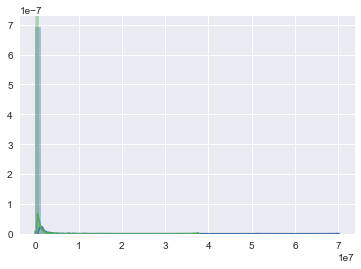

In [146]:
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="darkgrid")
#df4 = sns.load_dataset(df3)
#df3 = sns.load_dataset('df')

y,X=dmatrices('percentage_gt_35~AssessedValue',data=df2)
sns.distplot(X[y[:,0]>0,1])
sns.distplot(X[y[:,0]==0,1])

*Since I am focusing on categorial statistics I di logistic regression . I did a bit of Linear regression just for experimental purpose.

In [149]:
import statsmodels
import statsmodels.stats as stats
#y, X = dmatrices('percentage_gt_35~AssessedValue', data=df2,return_type='dataframe')
model = smf.OLS.from_formula('percentage_gt_35~AssessedValue', data = df2)
results = model.fit()
print(results.params)
import patsy
f = 'percentage_gt_35~AssessedValue'

y, X = patsy.dmatrices(f, df2, return_type='dataframe')

sm.Logit(y, X).fit().summary()
#logitfit = smf.logit(formula = str(f), data = hgc).fit()

Intercept        6.181594e-01
AssessedValue    1.384277e-08
dtype: float64
Optimization terminated successfully.
         Current function value: 0.661344
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       percentage_gt_35   No. Observations:                49563
Model:                          Logit   Df Residuals:                    49561
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                0.002298
Time:                        23:28:49   Log-Likelihood:                -32778.
converged:                       True   LL-Null:                       -32854.
                                        LLR p-value:                 1.065e-34
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4449      0.011     41.581      0.000       0.424       0.466
AssessedValue  2.029e-07   2.11e-08      9.607      0.000    1.61e-07    2.44e-07
=================================================================================
"""

In [156]:
model = smf.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.661344
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       percentage_gt_35   No. Observations:                49563
Model:                          Logit   Df Residuals:                    49561
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                0.002298
Time:                        23:41:16   Log-Likelihood:                -32778.
converged:                       True   LL-Null:                       -32854.
                                        LLR p-value:                 1.065e-34
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4449      0.011     41.581      0.000       0.424       0.466
AssessedValue  2.029e-07   2.11e-08      9.607      0.000    1.61e-07    2.44e-07
=================================================================================
"""

# Predictive Analysis

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



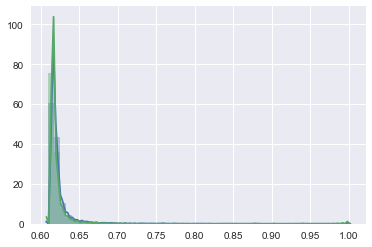

In [161]:
yhat = result.predict(X)
sns.distplot(yhat[y.iloc[:,0] > 0])
sns.distplot(yhat[y.iloc[:,0]== 0])

This model predicts with only 59% of accuracy which is not a good model to prove my statement.

In [178]:
import sklearn.metrics
yhat = result.predict(X) > .62
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.41      0.75      0.53     18714
        1.0       0.70      0.35      0.46     30849

avg / total       0.59      0.50      0.49     49563



In case of doing linear regression from sklearn the model also gives only 39% .

In [195]:
import sklearn
from sklearn import ensemble
import sklearn.svm
y,X = dmatrices('percentage_gt_35~AssessedValue', data=df2)
sklearn.linear_model.LogisticRegression()
#sklearn.LogisticRegression()
model = sklearn.linear_model.LogisticRegression()

model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00     18714
        1.0       0.62      1.00      0.77     30849

avg / total       0.39      0.62      0.48     49563



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Since the previous models didn't give a better accuracy I performed random forest algorithm to generate a better accuracy

In [223]:
y,X = dmatrices('percentage_gt_35~AssessedValue', data=df2)

model=sklearn.ensemble.RandomForestClassifier()
model.fit(X,y)
yhat=model.predict(X)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [224]:
df2.columns

Index(['Name', 'SerialNbr', 'ListYear', 'DateRecorded', 'AssessedValue',
       'SalePrice', 'SalesRatio', 'Address', 'diff', 'increase_decrease',
       'percentage', 'percentage_gt_35'],
      dtype='object')

In [225]:
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.74      0.68      0.71     18714
        1.0       0.81      0.86      0.84     30849

avg / total       0.79      0.79      0.79     49563



In [226]:
y,X = dmatrices('percentage_gt_35~AssessedValue+SalePrice', data=df2)

model=sklearn.ensemble.RandomForestClassifier()
model.fit(X,y)
yhat=model.predict(X)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [227]:
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     18714
        1.0       1.00      1.00      1.00     30849

avg / total       1.00      1.00      1.00     49563



In [233]:
y,X = dmatrices('percentage_gt_35~AssessedValue+increase_decrease', data=df2)

model=sklearn.ensemble.RandomForestClassifier()
model.fit(X,y)
yhat=model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



             precision    recall  f1-score   support

        0.0       0.80      0.73      0.76     18714
        1.0       0.84      0.89      0.87     30849

avg / total       0.83      0.83      0.83     49563



In [ ]:
I also performed Knn neighbour classifier test which gives an accuracy of 71%.

In [234]:
from sklearn import neighbors, datasets
knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
model=knn.fit(X, y)
yhat=model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



             precision    recall  f1-score   support

        0.0       0.67      0.50      0.57     18714
        1.0       0.74      0.85      0.79     30849

avg / total       0.71      0.72      0.71     49563



In [202]:
df2.columns

Index(['Name', 'SerialNbr', 'ListYear', 'DateRecorded', 'AssessedValue',
       'SalePrice', 'SalesRatio', 'Address', 'diff', 'increase_decrease',
       'percentage', 'percentage_gt_35'],
      dtype='object')

In [216]:
from sklearn import tree
#y,X = dmatrices('percentage_gt_35~AssessedValue', data=df2)

X = df2[["AssessedValue"]]
y = df2[["percentage_gt_35"]]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict(X)
#clf.predict(X).mean()
#array([0.5])
#print(sklearn.metrics.classification_report(yn))

0.6224199503662007

In [219]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = np.array(df2["AssessedValue"])
y_true = np.array(df2["percentage_gt_35"])
accuracy_score(y_true, y_pred)


0.002179044852006537

In [220]:
accuracy_score(y_true, y_pred, normalize=False)

108

# Conclusion:
    

Thw random forest algorithm fits in the best way for the model.This means there is 81% probability that the price of the properties will increase by 35% the next year.